过度使用多线性这样的武器，会设计到过拟合和欠拟合

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

In [7]:
poly2_reg = PolynomialRegression(degree=3)

In [8]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x +2 + np.random.normal(size = x.shape)

In [9]:
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [11]:
from sklearn.metrics import mean_squared_error
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.2664598468187027

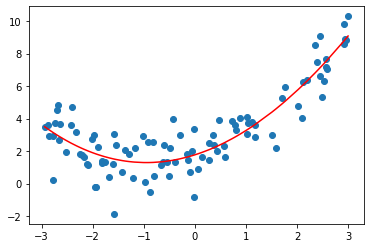

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color = 'r')
plt.show()

In [15]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.128265112398184

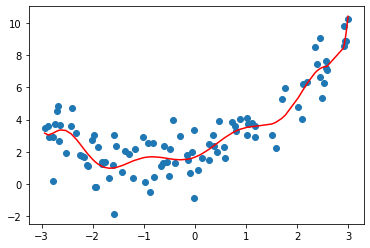

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color = 'r')
plt.show()

In [18]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.7211977302305358

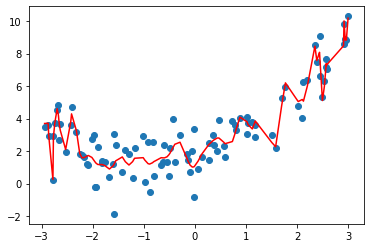

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color = 'r')
plt.show()

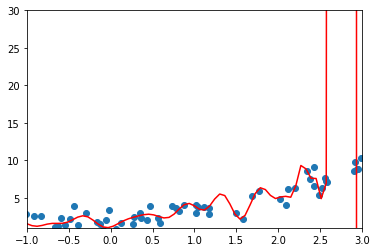

In [21]:
x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(x_plot)

plt.scatter(x, y)
plt.plot(x_plot[:,0], y_plot, color = 'r')
plt.axis([-1,3,1,30])
plt.show()